# EDA
---

1. 질병 별 비율
2. annotation counting
3. 한 호흡당 길이 plotting
4. 사분위수

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 질병 비율 확인

In [44]:
diagnosis_file_path = '/content/drive/MyDrive/data/ICBHI_Challenge_diagnosis.txt'
diagnosis_df = pd.read_csv(diagnosis_file_path, sep='\t', header=None, names=['patient_id', 'disease'])

In [45]:
diagnosis_df.head()

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [47]:
print(diagnosis_df.disease.value_counts())
print('')
print(diagnosis_df.disease.value_counts(normalize=True) *100)

disease
COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: count, dtype: int64

disease
COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: proportion, dtype: float64


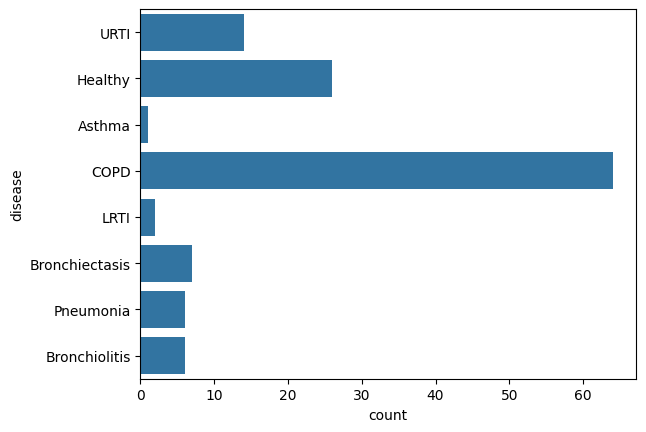

In [48]:
sns.countplot(diagnosis_df.disease)
plt.show()

## 2. counting classes

In [27]:
label_counts = pd.read_csv('/content/drive/MyDrive/for_update/data/metadata/label_counts.csv')

In [28]:
label_counts.head()

,filename,duration,crackles,wheezes,only_crackles,only_wheezes,both,normal,total
0,101_1b1_Al_sc_Meditron,20.000,0,0,0,0,0,12,12
1,101_1b1_Pr_sc_Meditron,20.000,0,0,0,0,0,11,11
2,102_1b1_Ar_sc_Meditron,20.000,0,0,0,0,0,13,13
3,103_2b2_Ar_mc_LittC2SE,20.000,0,4,0,4,0,2,6
4,104_1b1_Al_sc_Litt3200,15.856,0,0,0,0,0,6,6


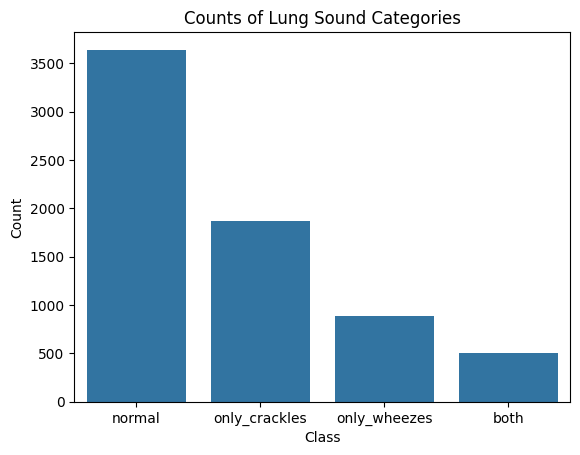

In [19]:
# 데이터프레임 생성
data = {
    'category': ['normal', 'only_crackles', 'only_wheezes', 'both'],
    'count': [label_counts['normal'].sum(),
              label_counts['only_crackles'].sum(),
              label_counts['only_wheezes'].sum(),
              label_counts['both'].sum()]
}

df = pd.DataFrame(data)

plt.figure()
sns.barplot(x='category', y='count', data=df)
plt.title('Counts of Lung Sound Categories')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

## 3. 호흡 길이 counting

In [40]:
annotation = pd.read_csv('/content/drive/MyDrive/for_update/data/metadata/annotation.csv')
annotation.head()

,filename,start,end,crackles,wheezes,both,normal
0,101_1b1_Al_sc_Meditron,0.036,0.579,0,0,0,1
1,101_1b1_Al_sc_Meditron,0.579,2.450,0,0,0,1
2,101_1b1_Al_sc_Meditron,2.450,3.893,0,0,0,1
3,101_1b1_Al_sc_Meditron,3.893,5.793,0,0,0,1
4,101_1b1_Al_sc_Meditron,5.793,7.521,0,0,0,1


In [41]:

annotation['pid'] = annotation['filename'].str[:3].astype('int32')
annotation.head()

,filename,start,end,crackles,wheezes,both,normal,pid
0,101_1b1_Al_sc_Meditron,0.036,0.579,0,0,0,1,101
1,101_1b1_Al_sc_Meditron,0.579,2.450,0,0,0,1,101
2,101_1b1_Al_sc_Meditron,2.450,3.893,0,0,0,1,101
3,101_1b1_Al_sc_Meditron,3.893,5.793,0,0,0,1,101
4,101_1b1_Al_sc_Meditron,5.793,7.521,0,0,0,1,101


<Axes: xlabel='None', ylabel='pid'>

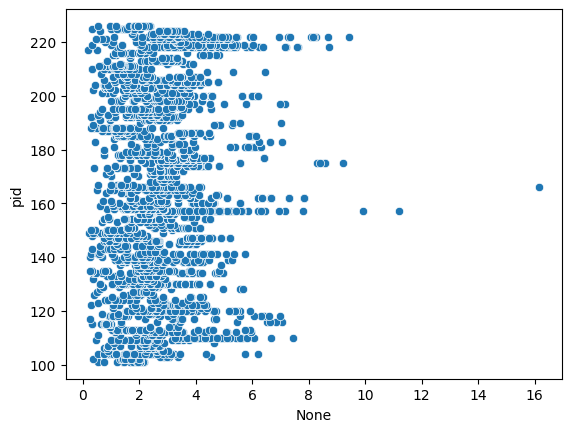

In [42]:
sns.scatterplot(x=(annotation.end - annotation.start),
                y=annotation.pid)

## 4. 사분위수

<Axes: ylabel='None'>

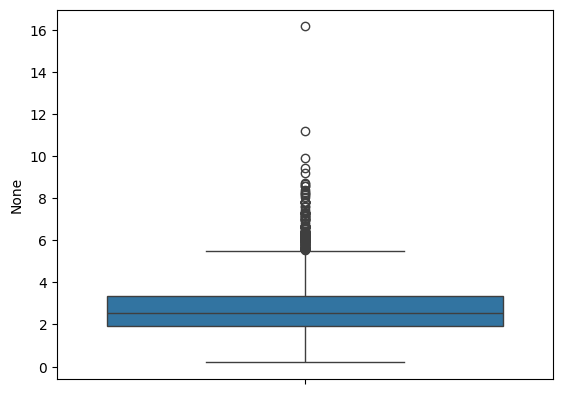

In [43]:
sns.boxplot(y=(annotation.end - annotation.start))

### 호흡 자르는 범위 결정:
호흡의 duration으로 보았을 떄 max값을 포함해야하므로 이상치를 약간 포함한 7초로 지정